In [39]:
import os
import numpy as np
import midi as md
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow import keras
from DataGenerator import MidiDataGenerator


In [55]:
def display_samples(sample):
#     plt.figure(figsize=(16,16))
#     for k in range(16):
#         plt.subplot(4,4,k+1)
#         plt.imshow(sample[k])
#         plt.axis('off')
    img = np.vstack([
        np.hstack(sample[4*k:4*k+4]) for k in range(4)
    ])
    
    plt.imshow(img)
    plt.show()

In [41]:
encoders, decoders = [], []

for root, dirs, files in os.walk('.'):
    for file in files:
        if file.endswith('decoder.h5'):
            decoders.append(os.path.join(root, file))
        if file.endswith('encoder.h5'):
            encoders.append(os.path.join(root, file))
            
encoders.sort()
decoders.sort()
for enc, denc in zip(encoders, decoders):
    print(enc, denc)

./encoder.h5 ./decoder.h5
./piano_100_encoder.h5 ./piano_100_decoder.h5
./piano_10_encoder.h5 ./piano_10_decoder.h5
./piano_150_encoder.h5 ./piano_150_decoder.h5
./piano_200_encoder.h5 ./piano_200_decoder.h5
./piano_20_encoder.h5 ./piano_20_decoder.h5
./piano_250_encoder.h5 ./piano_250_decoder.h5
./piano_50_encoder.h5 ./piano_50_decoder.h5
./switch_100_encoder.h5 ./switch_100_decoder.h5
./switch_10_encoder.h5 ./switch_10_decoder.h5
./switch_20_encoder.h5 ./switch_20_decoder.h5
./switch_50_encoder.h5 ./switch_50_decoder.h5
./windows_100_encoder.h5 ./windows_100_decoder.h5
./windows_10_encoder.h5 ./windows_10_decoder.h5
./windows_20_encoder.h5 ./windows_20_decoder.h5
./windows_50_encoder.h5 ./windows_50_decoder.h5


In [42]:
idx = 3

encoder = keras.models.load_model(encoders[idx])
decoder = keras.models.load_model(decoders[idx])


encorder.compile(
    optimizer=keras.optimizers.RMSprop(lr=1e-3),
    loss='binary_crossentropy',
)
decorder.compile(
    optimizer=keras.optimizers.RMSprop(lr=1e-3), 
    loss='binary_crossentropy',
)

In [93]:
midi = MidiDataGenerator('./raw/piano', m=16)
X = midi.samples(all=True)

In [141]:
def random_songs(X, encoder, decoder, k):
    # random index
    index = np.arange(X.shape[0])
    s = np.random.choice(index, size=k, replace=False)
    
    Xs = X[s]
    Ys = encoder.predict(Xs)
    weights = np.random.rand(k,1)
#     weights /= np.linalg.norm(weights)
    print(weights.T[0])
    
    pcs = (weights * Ys).sum(axis=0).reshape(1,-1)
    print(pcs)
    res = decoder.predict(pcs)
    
    md.samples_to_midi(res[0], 'test_%d.mid'%(1001), thresh=0.4)
    display_samples(res[0])
    

[0.15395526 0.8658099  0.20977902 0.52611416]
[[ 2.74534939  2.40048106 -0.31491734  1.53386023 -0.98234664 -0.31944484
  -1.05000293  1.93925785 -0.99015268 -0.47060601 -0.17954636  2.26144467
   0.68370407  1.55496256  1.50699577  0.18595641 -0.06727578 -1.43299231
  -1.08356597  0.65986082 -1.23592304  1.58701128  0.70338945 -0.97183854
  -2.29117247  0.36448608  0.22443628 -1.08542358 -1.12149871  1.83641867
  -1.67900215 -1.15888237 -0.23145559 -1.33596805  0.48810308 -1.067205
  -1.00748665  1.33198143 -0.15520476 -1.31055948  2.00200676  0.84816104
  -0.91971775 -1.71902677 -0.98195198  0.95044474 -2.01570811  0.0362643
  -0.61779256  0.18005233 -1.1820325   1.42286796  1.18309368  0.22979926
  -1.24470827  1.27567537  0.51689938 -0.01403771 -0.82909253 -0.27096248
  -1.36633189  1.54335842 -1.32440154  0.28947848 -0.18710062  0.80869144
  -1.61468008  1.21368277 -0.87442499 -0.21097633 -1.99125188  0.94380719
  -0.77939686 -0.64367707  1.04348514 -0.89114416  0.81363885  0.4270

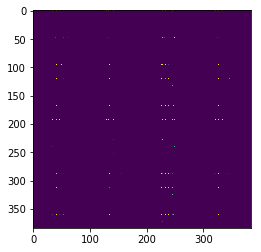

In [147]:
random_songs(X, encoder, decoder, 4)

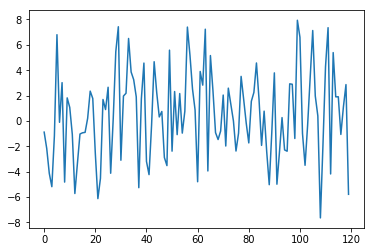

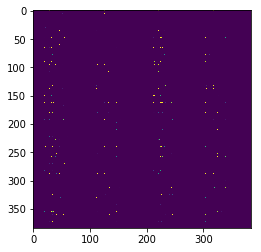

In [90]:
# pcs = np.random.normal(loc=0, scale=5.0, size=(1,120))
# pcs = encoder.predict(X[6:7])

plt.plot(np.arange(120), pcs[0])
plt.show()

res = decoder.predict(pcs)
display_samples(res[0])

In [92]:
md.samples_to_midi(res[0], 'test_%d.mid'%(1000), thresh=0.5)

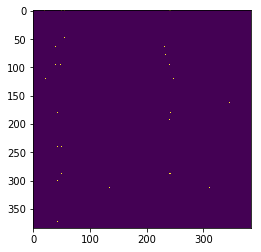

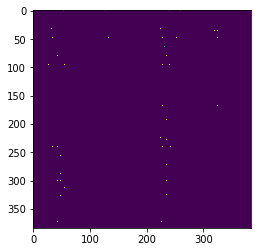

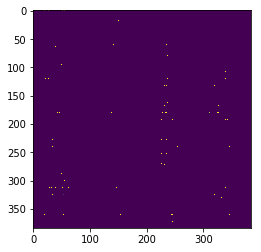

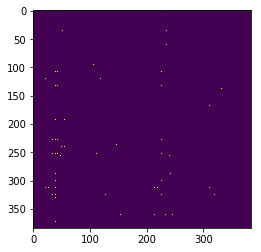

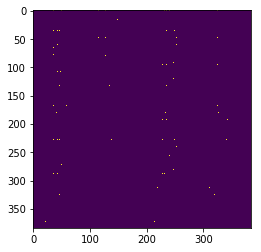

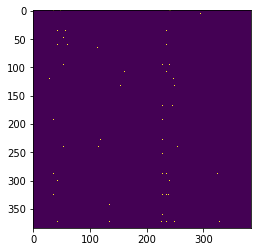

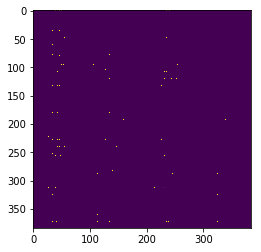

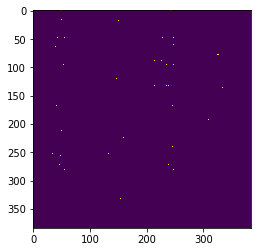

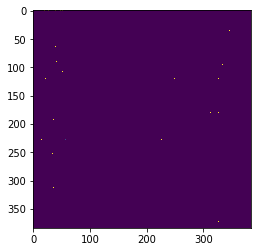

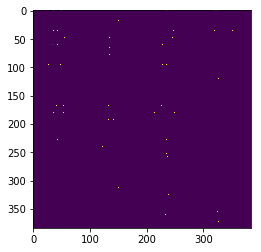

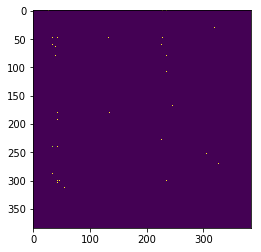

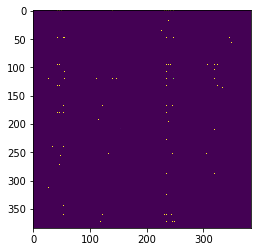

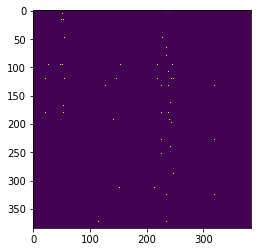

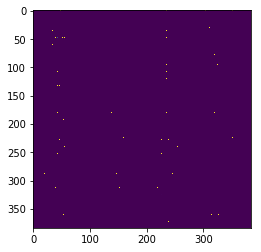

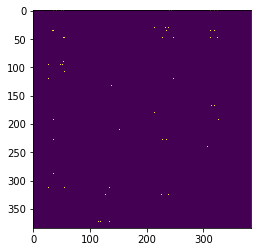

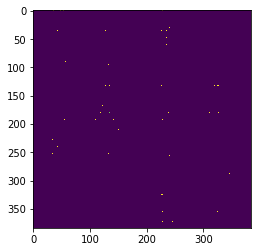

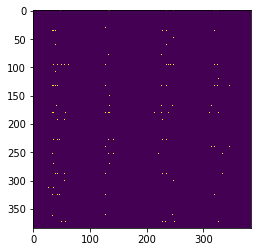

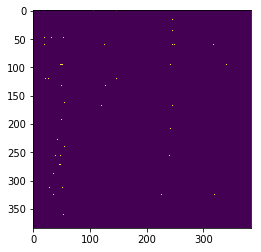

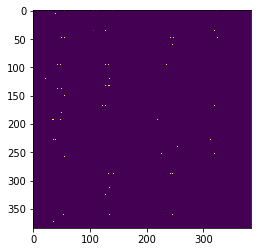

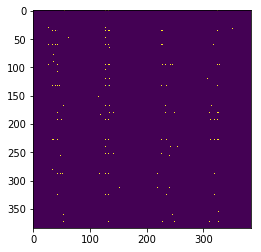

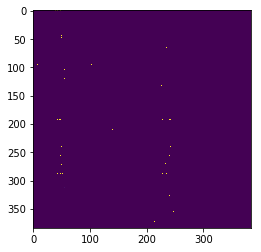

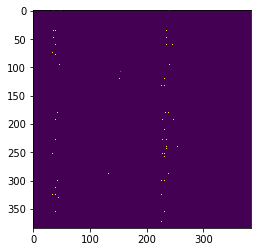

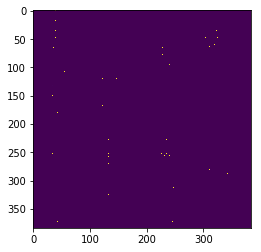

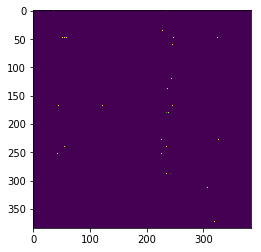

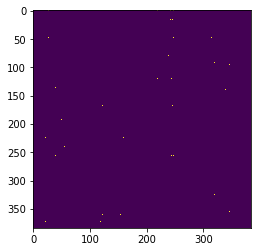

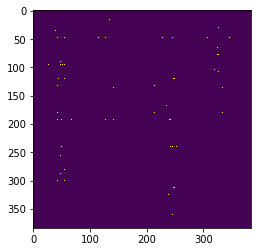

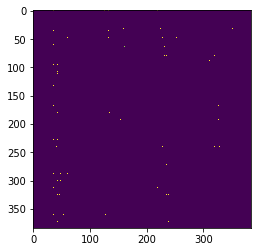

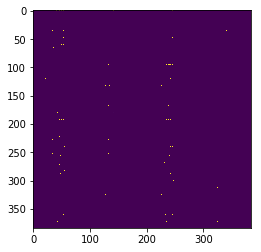

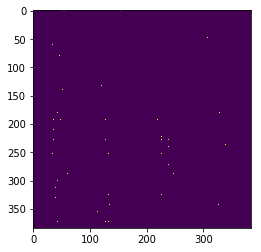

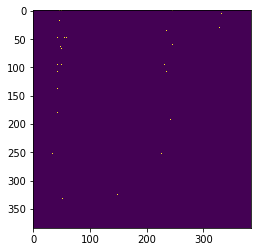

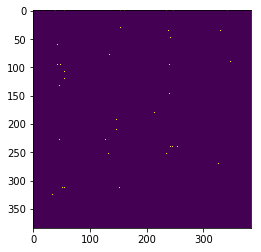

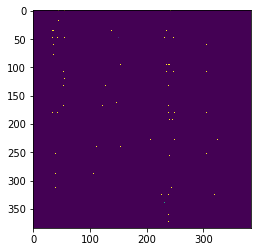

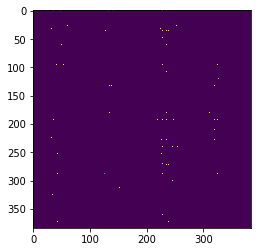

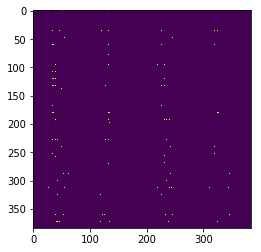

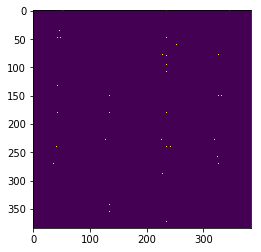

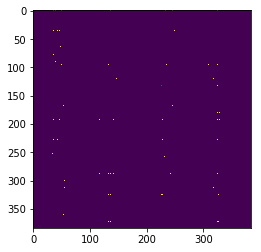

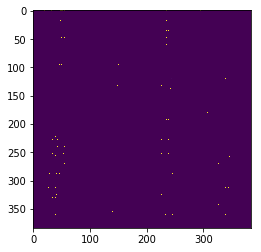

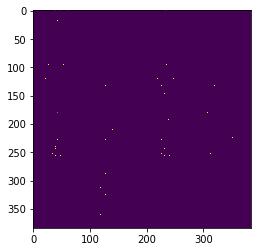

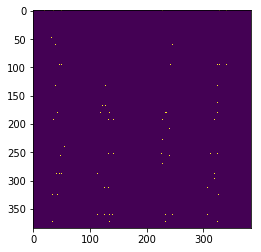

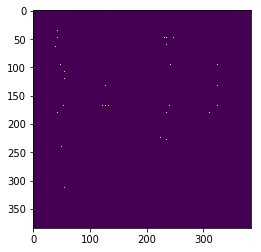

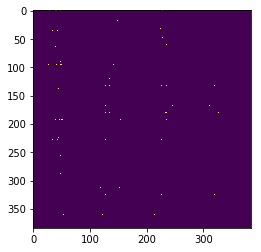

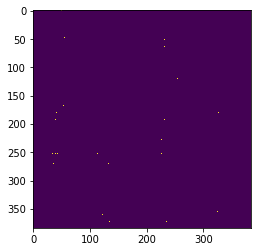

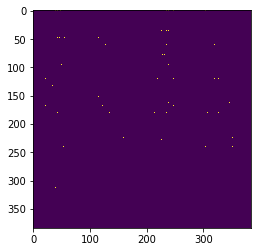

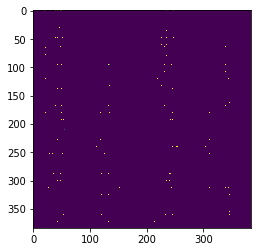

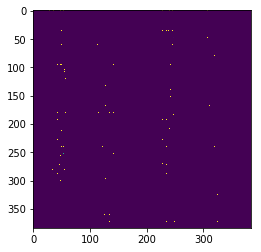

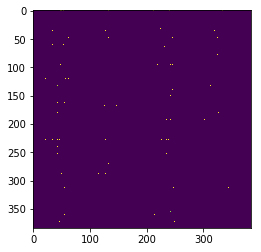

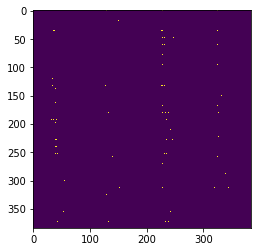

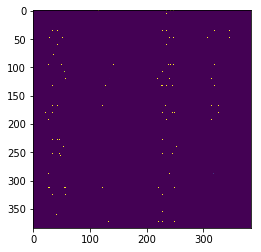

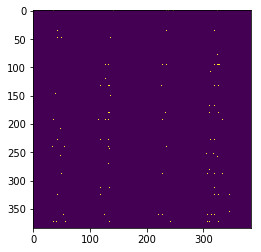

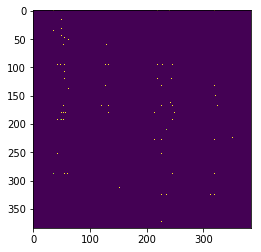

In [63]:
for trial in range(50):
    pcs = np.random.normal(loc=0.0, scale=200.0, size=(1,120))
    res = decorder.predict(pcs)
    display_samples(res[0])
    
    md.samples_to_midi(res[0], 'test_%d.mid'%(trial), thresh=0.5)